In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Importing Classifier Modules
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df['Parch'].value_counts()
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [6]:
df['Embarked'] = df['Embarked'].fillna('S')
df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

/var/folders/tx/ys48hjmx6d1_170rbcjfjg7m0000gn/T/ipykernel_97616/2499328607.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Age'].notnull()]['Age'])


<AxesSubplot: xlabel='Age', ylabel='Density'>

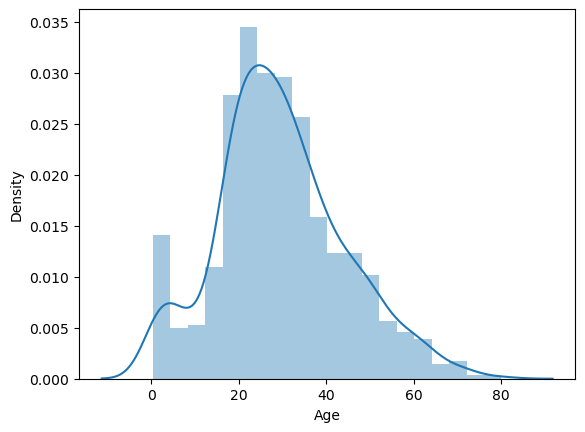

In [7]:
sns.distplot(df[df['Age'].notnull()]['Age'])

In [8]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [9]:
df['Age'] = df['Age'].interpolate()
df['Age'].describe()

count    891.000000
mean      29.726061
std       13.902353
min        0.420000
25%       21.000000
50%       28.500000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [10]:
len(df['Cabin'].unique())

148

In [11]:
df = df.drop('Cabin', axis = 1)

In [12]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [13]:
df = df.drop(['PassengerId', 'Name', 'Ticket'], axis = 1)

In [14]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


<AxesSubplot: xlabel='Pclass', ylabel='count'>

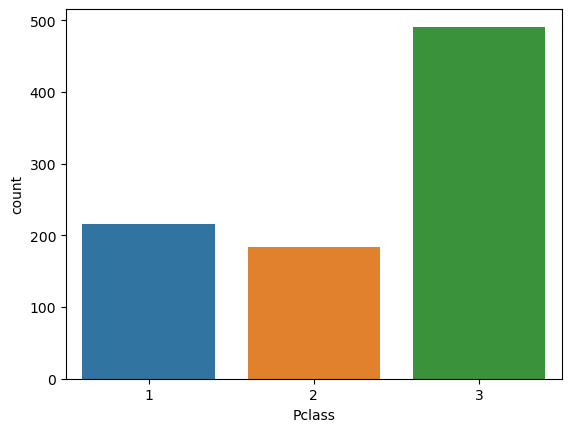

In [15]:
sns.countplot(x='Pclass', data=df)

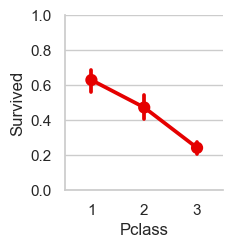

In [16]:
sns.set(style="whitegrid")
g = sns.PairGrid(data=df, x_vars=['Pclass'], y_vars='Survived')
g.map(sns.pointplot, color=sns.xkcd_rgb["red"])
g.set(ylim=(0, 1))

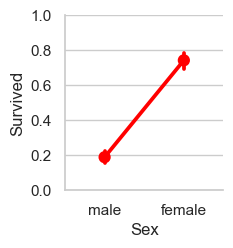

In [17]:
h = sns.PairGrid(data=df, x_vars=['Sex'], y_vars='Survived')
h.map(sns.pointplot, color="red")
h.set(ylim=(0, 1))

In [18]:
df['is_child'] = df['Age'].apply(lambda x: 1 if x<=15 else 0)

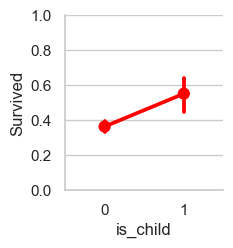

In [19]:
a = sns.PairGrid(data=df, x_vars=['is_child'], y_vars='Survived')
a.map(sns.pointplot, color="red")
a.set(ylim=(0, 1))

In [20]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,is_child
0,0,3,male,22.0,1,0,7.2500,S,0
1,1,1,female,38.0,1,0,71.2833,C,0
2,1,3,female,26.0,0,0,7.9250,S,0
3,1,1,female,35.0,1,0,53.1000,S,0
4,0,3,male,35.0,0,0,8.0500,S,0


In [21]:
df['family'] = df['SibSp'] + df['Parch']

In [22]:
df = df.drop(['SibSp', 'Parch'], axis = 1)

In [23]:
df.head(20)

,Survived,Pclass,Sex,Age,Fare,Embarked,is_child,family
0,0,3,male,22.0,7.2500,S,0,1
1,1,1,female,38.0,71.2833,C,0,1
2,1,3,female,26.0,7.9250,S,0,0
3,1,1,female,35.0,53.1000,S,0,1
4,0,3,male,35.0,8.0500,S,0,0
5,0,3,male,44.5,8.4583,Q,0,0
6,0,1,male,54.0,51.8625,S,0,0
7,0,3,male,2.0,21.0750,S,1,4
8,1,3,female,27.0,11.1333,S,0,2
9,1,2,female,14.0,30.0708,C,1,1


In [24]:
df['is_alone'] = df['family'].apply(lambda x: 1 if x == 0 else 0)

In [25]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,is_child,family,is_alone
0,0,3,male,22.0,7.2500,S,0,1,0
1,1,1,female,38.0,71.2833,C,0,1,0
2,1,3,female,26.0,7.9250,S,0,0,1
3,1,1,female,35.0,53.1000,S,0,1,0
4,0,3,male,35.0,8.0500,S,0,0,1


In [26]:
df['is_female'] = df['Sex'].apply(lambda x: 1 if x == 'female' else 0)

In [27]:
df = df.drop('Sex', axis = 1)

In [28]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Age        891 non-null    float64
 3   Fare       891 non-null    float64
 4   Embarked   891 non-null    object 
 5   is_child   891 non-null    int64  
 6   family     891 non-null    int64  
 7   is_alone   891 non-null    int64  
 8   is_female  891 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 62.8+ KB


In [29]:
df = pd.get_dummies(df, prefix = ['is'])

In [30]:
df.head()

,Survived,Pclass,Age,Fare,is_child,family,is_alone,is_female,is_C,is_Q,is_S
0,0,3,22.0,7.2500,0,1,0,0,0,0,1
1,1,1,38.0,71.2833,0,1,0,1,1,0,0
2,1,3,26.0,7.9250,0,0,1,1,0,0,1
3,1,1,35.0,53.1000,0,1,0,1,0,0,1
4,0,3,35.0,8.0500,0,0,1,0,0,0,1


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Age        891 non-null    float64
 3   Fare       891 non-null    float64
 4   is_child   891 non-null    int64  
 5   family     891 non-null    int64  
 6   is_alone   891 non-null    int64  
 7   is_female  891 non-null    int64  
 8   is_C       891 non-null    uint8  
 9   is_Q       891 non-null    uint8  
 10  is_S       891 non-null    uint8  
dtypes: float64(2), int64(6), uint8(3)
memory usage: 58.4 KB


           Survived    Pclass       Age      Fare  is_child    family  \
Survived   1.000000 -0.338481 -0.062164  0.257307  0.120849  0.016639   
Pclass    -0.338481  1.000000 -0.304934 -0.549500  0.127727  0.065997   
Age       -0.062164 -0.304934  1.000000  0.087119 -0.578325 -0.230794   
Fare       0.257307 -0.549500  0.087119  1.000000  0.002957  0.217138   
is_child   0.120849  0.127727 -0.578325  0.002957  1.000000  0.361149   
family     0.016639  0.065997 -0.230794  0.217138  0.361149  1.000000   
is_alone  -0.203367  0.135207  0.169425 -0.271832 -0.293693 -0.690922   
is_female  0.543351 -0.131900 -0.061332  0.182333  0.086078  0.200988   
is_C       0.168240 -0.243292  0.015818  0.269335  0.050640 -0.046215   
is_Q       0.003650  0.221009  0.019004 -0.117216 -0.005989 -0.058592   
is_S      -0.149683  0.074053 -0.025817 -0.162184 -0.040594  0.077359   

           is_alone  is_female      is_C      is_Q      is_S  
Survived  -0.203367   0.543351  0.168240  0.003650 -0.149683

<AxesSubplot: >

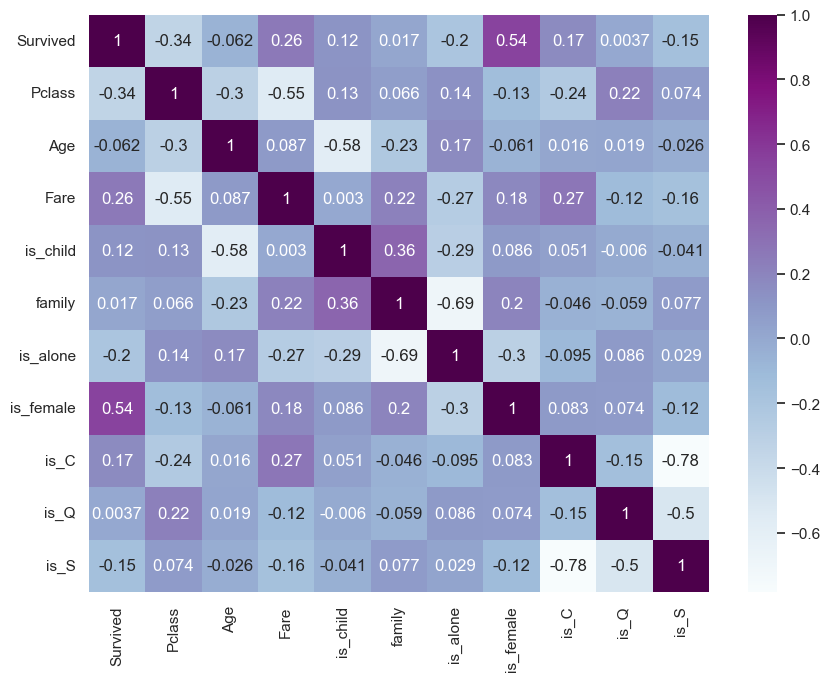

In [32]:
#Testing for Correlation (Multicollinearity)
corr_var=df.corr()
print(corr_var)
plt.figure(figsize=(10,7.5))
sns.heatmap(corr_var, annot=True, cmap='BuPu')

In [33]:
x,y = df.drop(['Survived'], axis=1), df['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, stratify=y)

In [35]:
y.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [36]:
def pfs_first_classifier(model):
    classifier = model()
    classifier.fit(x_train,y_train)
    print(classifier.score(x_test,y_test))
    return classifier

In [37]:
descision_tree = pfs_first_classifier(SGDClassifier)
descision_tree_1 = pfs_first_classifier(GradientBoostingClassifier)
random_forest = pfs_first_classifier(RandomForestClassifier)

0.7821229050279329
0.8100558659217877
0.8156424581005587


In [38]:
clf = LogisticRegression()
clf.fit(x_train, y_train)
y_pred_lr = clf.predict(x_test)
acc_log_reg = round( clf.score(x_test, y_test) * 100, 2)
print (str(acc_log_reg) + ' percent')

81.01 percent


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [39]:
clf = SVC()
clf.fit(x_train, y_train)
y_pred_svc = clf.predict(x_test)
acc_svc = round( clf.score(x_test, y_test) * 100, 2)
print (str(acc_svc) + ' percent')

65.36 percent


In [40]:
clf = RandomForestClassifier()
clf.fit(x_train, y_train)
y_pred_random = clf.predict(x_test)
acc_random = round( clf.score(x_test, y_test) * 100, 2)
print (str(acc_random) + ' percent')
print(x_train)

81.01 percent
     Pclass   Age      Fare  is_child  family  is_alone  is_female  is_C  \
363       3  35.0    7.0500         0       0         1          0     0   
162       3  26.0    7.7750         0       0         1          0     0   
26        3  28.5    7.2250         0       0         1          0     1   
854       2  44.0   26.0000         0       1         0          1     0   
308       2  30.0   24.0000         0       1         0          0     1   
..      ...   ...       ...       ...     ...       ...        ...   ...   
725       3  20.0    8.6625         0       0         1          0     0   
390       1  36.0  120.0000         0       3         0          0     0   
660       1  50.0  133.6500         0       2         0          0     0   
853       1  16.0   39.4000         0       1         0          1     0   
466       2  47.0    0.0000         0       0         1          0     0   

     is_Q  is_S  
363     0     1  
162     0     1  
26      0     0  
8

In [41]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
cm = confusion_matrix(y_test, y_pred_random)
print(cm)
score = accuracy_score(y_test,y_pred_random)
print(score)

[[97 13]
 [21 48]]
0.8100558659217877


In [42]:
import sklearn.metrics as metrics
print(metrics.classification_report(y_test, y_pred_random))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       110
           1       0.79      0.70      0.74        69

    accuracy                           0.81       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.81      0.81      0.81       179



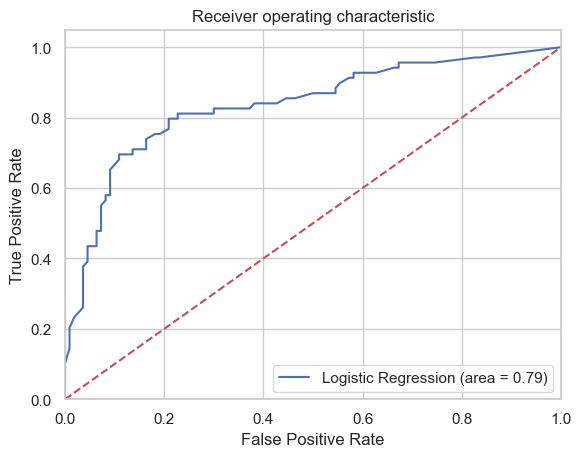

In [43]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, clf.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Applying to Holdout Test

In [44]:
df1 = pd.read_csv('holdout_test.csv')
df1.head()

,Survived,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,NaN,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,NaN,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,NaN,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,NaN,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,NaN,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [45]:
df1['Age'] = df1['Age'].interpolate()
df1 = df1.drop('Cabin', axis = 1)
df1 = df1.drop(['PassengerId', 'Name', 'Ticket'], axis = 1)
df1['is_child'] = df1['Age'].apply(lambda x: 1 if x<=15 else 0)
df1['family'] = df1['SibSp'] + df1['Parch']
df1 = df1.drop(['SibSp', 'Parch'], axis = 1)
df1['is_alone'] = df1['family'].apply(lambda x: 1 if x == 0 else 0)
df1['is_female'] = df1['Sex'].apply(lambda x: 1 if x == 'female' else 0)
df1 = df1.drop('Sex', axis = 1)
df1 = pd.get_dummies(df1, prefix = ['is'])

In [46]:
df1['Fare'] = df1['Fare'].fillna(df1 [ 'Fare'].mean())

In [47]:
df1.head()

,Survived,Pclass,Age,Fare,is_child,family,is_alone,is_female,is_C,is_Q,is_S
0,NaN,3,34.5,7.8292,0,0,1,0,0,1,0
1,NaN,3,47.0,7.0000,0,1,0,1,0,0,1
2,NaN,2,62.0,9.6875,0,0,1,0,0,1,0
3,NaN,3,27.0,8.6625,0,0,1,0,0,0,1
4,NaN,3,22.0,12.2875,0,2,0,1,0,0,1


In [48]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   0 non-null      float64
 1   Pclass     418 non-null    int64  
 2   Age        418 non-null    float64
 3   Fare       418 non-null    float64
 4   is_child   418 non-null    int64  
 5   family     418 non-null    int64  
 6   is_alone   418 non-null    int64  
 7   is_female  418 non-null    int64  
 8   is_C       418 non-null    uint8  
 9   is_Q       418 non-null    uint8  
 10  is_S       418 non-null    uint8  
dtypes: float64(3), int64(5), uint8(3)
memory usage: 27.5 KB


In [49]:
x_test = df1.drop(['Survived'],axis=1)
x_test.head()

,Pclass,Age,Fare,is_child,family,is_alone,is_female,is_C,is_Q,is_S
0,3,34.5,7.8292,0,0,1,0,0,1,0
1,3,47.0,7.0000,0,1,0,1,0,0,1
2,2,62.0,9.6875,0,0,1,0,0,1,0
3,3,27.0,8.6625,0,0,1,0,0,0,1
4,3,22.0,12.2875,0,2,0,1,0,0,1


In [50]:
y_pred_ran = clf.predict(x_test)

In [51]:
y_pred_ran

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [52]:
len(y_pred_ran)

418

In [53]:
dataframe = pd.DataFrame(y_pred_ran) 
dataframe.to_csv("Titanic_Siri.csv",index=False)

In [54]:
df_res = pd.read_csv("Titanic_Siri.csv")

In [55]:
df_res.head(10)

,0
0,0
1,0
2,0
3,0
4,1
5,0
6,0
7,0
8,1
9,0
